In [74]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime, time
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

## 2008

#### JPY

In [154]:
file_list = glob.glob('2008ACJU/*-JPY=D3.csv')
JPY_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: 1 if 'b' in x else (-1 if 's' in x else 0))
    
    # quoted spread
    temp_month['ILS'] = temp_month['Ask Price'] - temp_month['Bid Price']
    # effective spread
    temp_month['ILE'] = 2* (temp_month['Price'] - temp_month['mid'])*temp_month['indicator']
    
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact

    temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    

    condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    temp_list =[np.nan]*len(temp_month)
    for i in tqdm(condition_indices):
        j = i + 1
        while j < len(temp_month):
            time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            if time_diff > 60:
                temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                break
            j += 1
            
    temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    
    JPY_list.append(temp_month_means)

 56%|██████████████████████████████████████████▊                                  | 2920/5257 [05:27<00:15, 151.98it/s]


  5%|███▉                                                                          | 215/4252 [00:01<00:25, 159.23it/s]


 74%|█████████████████████████████████████████████████████████                    | 3153/4252 [00:17<00:05, 211.04it/s]


 24%|██████████████████▎                                                          | 1687/7093 [00:09<00:41, 129.61it/s]


 54%|█████████████████████████████████████████▊                                   | 3856/7093 [01:00<00:29, 108.54it/s]


 76%|███████████████████████████████████████████████████████████▍                  | 5409/7093 [01:16<00:20, 81.45it/s]


 17%|█████████████                                                                 | 698/4176 [02:45<00:21, 164.53it/s]


 79%|█████████████████████████████████████████████████████████████                | 3315/4176 [03:01<00:06, 142.75it/s]


 32%|████████████████████████▉                                                    | 1870/5784 [00:11<00:23, 167.80it/s]


 93%|███████████████████████████████████████████████████████████████████████▎     | 5354/5784 [00:27<00:01, 239.11it/s]


 60%|██████████████████████████████████████████████                               | 3077/5143 [00:14<00:08, 237.78it/s]


 30%|███████████████████████▏                                                     | 1850/6146 [00:08<00:41, 103.41it/s]


 79%|████████████████████████████████████████████████████████████▍                | 4826/6146 [00:24<00:04, 266.27it/s]


 65%|██████████████████████████████████████████████████                           | 2479/3809 [01:09<00:05, 230.52it/s]


 40%|██████████████████████████████▋                                              | 1647/4125 [00:09<00:16, 149.06it/s]


 84%|████████████████████████████████████████████████████████████████▊            | 3470/4125 [00:26<00:05, 121.38it/s]


 56%|███████████████████████████████████████████                                  | 2198/3934 [00:12<00:15, 115.00it/s]


  6%|████▊                                                                         | 114/1832 [00:00<00:09, 186.85it/s]


 21%|████████████████▌                                                             | 327/1536 [00:03<00:09, 125.06it/s]


 30%|███████████████████████                                                      | 1100/3671 [00:11<00:23, 108.69it/s]


 71%|███████████████████████████████████████████████████████                       | 2592/3671 [00:37<00:21, 50.81it/s]


 12%|█████████▌                                                                     | 463/3834 [00:04<00:44, 76.16it/s]


 55%|██████████████████████████████████████████▌                                  | 2121/3834 [00:20<00:08, 207.85it/s]


 13%|█████████▉                                                                    | 278/2180 [00:01<00:08, 223.83it/s]


 47%|████████████████████████████████████▋                                         | 843/1795 [00:06<00:05, 160.39it/s]


 54%|█████████████████████████████████████████▊                                   | 1324/2441 [00:14<00:06, 162.05it/s]


 31%|████████████████████████                                                      | 900/2916 [00:08<00:17, 118.43it/s]


  2%|█▉                                                                             | 55/2297 [00:00<00:19, 112.65it/s]


 96%|█████████████████████████████████████████████████████████████████████████▌   | 2195/2297 [00:28<00:00, 119.11it/s]


 88%|███████████████████████████████████████████████████████████████████▍         | 2221/2538 [00:59<00:01, 200.82it/s]


 94%|████████████████████████████████████████████████████████████████████████▏    | 2339/2494 [00:33<00:00, 177.74it/s]


 93%|████████████████████████████████████████████████████████████████████████▋     | 2280/2447 [00:35<00:01, 88.88it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [24:56<00:00, 62.36s/it]


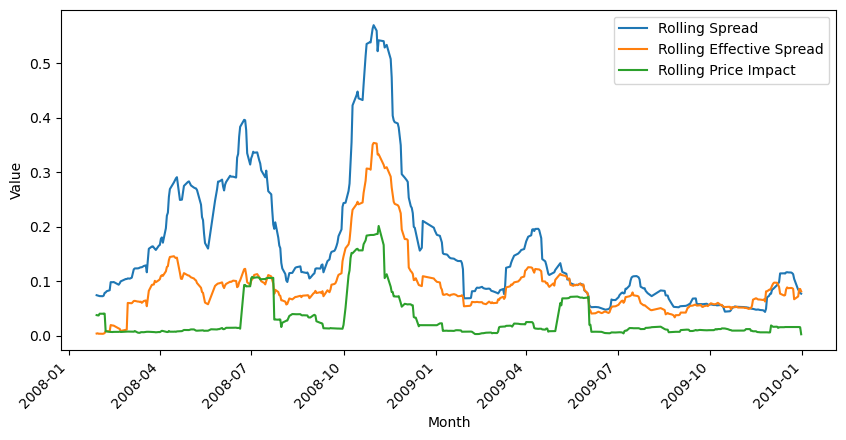

In [157]:
JPY = pd.concat(JPY_list, axis=0, ignore_index=None)
JPY['ILP'] = JPY['ILP'].mask(JPY['ILP'] < 0)
JPY.dropna(subset=['ILS'], inplace=True)
JPY.dropna(subset=['ILE'], inplace=True)
JPY.dropna(subset=['ILP'], inplace=True)
rolling_spread = JPY['ILS'].rolling(window=20).mean()
rolling_effective =  JPY['ILE'].rolling(window=20).mean()
rolling_pi =  JPY['ILP'].rolling(window=20).mean()
rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

In [161]:
JPY.to_csv('data/market liquidity/JPY_1min.csv')

#### AUD

In [102]:
file_list = glob.glob('2008ACJU/*-AUD=D3.csv')
AUD_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: 1 if 'b' in x else (-1 if 's' in x else 0))
    
    # quoted spread
    temp_month['ILS'] = (temp_month['Ask Price'] - temp_month['Bid Price'])/temp_month['mid']
   
    # effective spread
    temp_month['ILE'] = ((temp_month['Price'] - temp_month['mid'])/temp_month['mid'])*temp_month['indicator']
    
    
    # price impact
    temp_month['ILP']= (temp_month['mid'] - temp_month['mid'].shift()) *temp_month['indicator'].shift()/temp_month['mid']
    temp_month['ILP'] = temp_month['ILP'].mask(temp_month['ILP'] < 0) # replace negative values with nan
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact 
    #condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    #temp_list =[np.nan]*len(temp_month)
    #for i in tqdm(condition_indices):
        #j = i + 1
        #while j < len(temp_month):
            #time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            #if time_diff > 60:
                #temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                #break
            #j += 1
            
    #temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    temp_month_return = temp_month.groupby('Date[G]').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
    temp_month_return.name = 'Return' 
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    merged_df = pd.merge(temp_month_means , temp_month_return,on='Date[G]')
    AUD_list.append(merged_df)

100%|█████████████████████████████████████████████████| 24/24 [00:48<00:00,  2.01s/it]


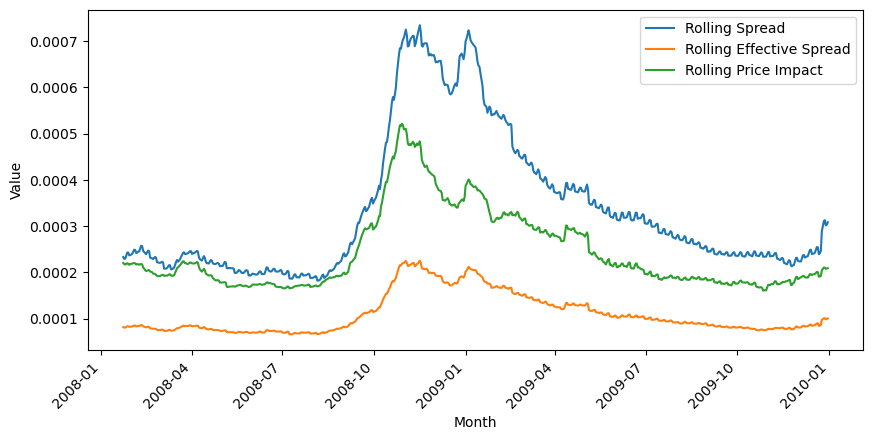

In [103]:

AUD = pd.concat(AUD_list, axis=0, ignore_index=None)
AUD.dropna(subset=['ILS'], inplace=True)
AUD.dropna(subset=['ILE'], inplace=True)
AUD.dropna(subset=['ILP'], inplace=True)
#AUD['ILS'] = AUD['ILS']/AUD['mid']
#AUD['ILE'] = AUD['ILE']/AUD['mid']
#AUD['ILP'] = AUD['ILP']/AUD['mid']

rolling_spread = AUD['ILS'].rolling(window=20).mean()
rolling_effective =  AUD['ILE'].rolling(window=20).mean()
rolling_pi =  AUD['ILP'].rolling(window=20).mean()
rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()


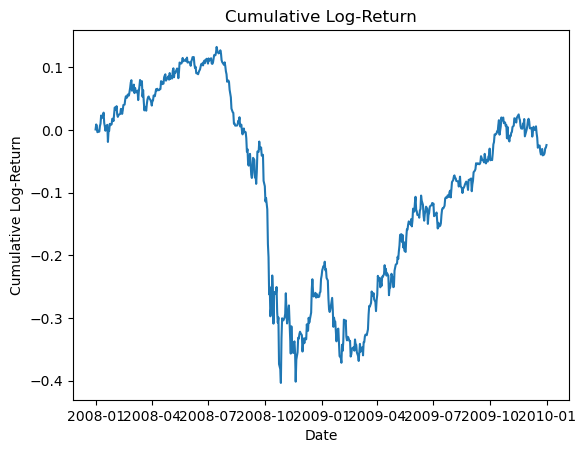

In [107]:
cumulative_log_return = AUD['Return'].cumsum()
plt.plot(AUD.index, cumulative_log_return)
plt.title('Cumulative Log-Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Return')
plt.show()

In [109]:
AUD.to_csv('data/market liquidity/AUD.csv')

In [73]:
correlation = AUD['ILS'].corr(AUD['ILE'])
correlation

0.9725430943120933

#### JPY

#### indirect

In [53]:
file_list = glob.glob('2008ACJU/*-JPY=D3.csv')
JPY_indirect_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    
    # change to USD/JPY
    temp1 = 1 / temp_month['Bid Price']
    temp2 = 1 / temp_month['Ask Price']

    temp_month['Price'] = 1/temp_month['Price']
    temp_month['Bid Price'] = temp2
    temp_month['Ask Price'] = temp1 
    
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: -1 if 'b' in x else (1 if 's' in x else 0))
    
     # quoted spread
    temp_month['ILS'] = temp_month['Ask Price'] - temp_month['Bid Price']
    
    # effective spread
    temp_month['ILE'] = 2* (temp_month['Price'] - temp_month['mid'])*temp_month['indicator']
    
    
    
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact
    temp_month['ILP']= (temp_month['mid'] - temp_month['mid'].shift()) *temp_month['indicator'].shift()
    temp_month['ILP'] = temp_month['ILP'].mask(temp_month['ILP'] < 0) # replace negative values with nan
    #condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    #temp_list =[np.nan]*len(temp_month)
    #for i in tqdm(condition_indices):
        #j = i + 1
        #while j < len(temp_month):
            #time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            #if time_diff > 60:
                #temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                #break
            #j += 1
            
    #temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    
    JPY_indirect_list.append(temp_month_means)
    

100%|█████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.55it/s]


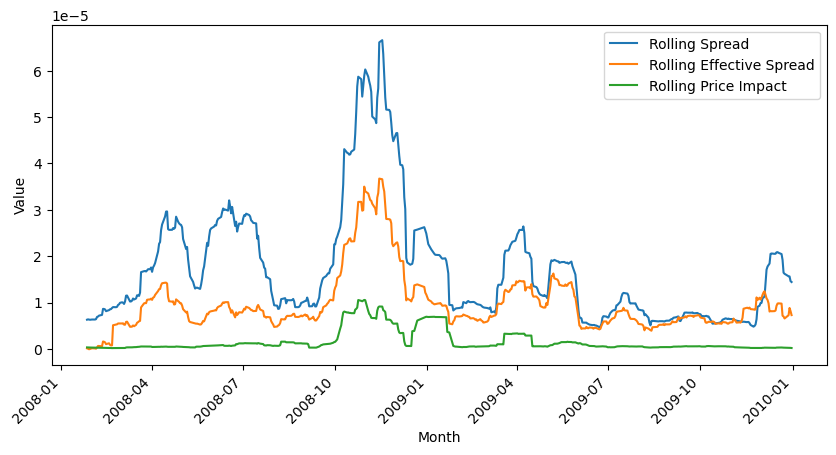

In [54]:
JPY_indrect = pd.concat(JPY_indirect_list, axis=0, ignore_index=None)
JPY_indrect.dropna(subset=['ILS'], inplace=True)
JPY_indrect.dropna(subset=['ILE'], inplace=True)
JPY_indrect.dropna(subset=['ILP'], inplace=True)
#JPY_indrect['ILS'] = JPY_indrect['ILS']/JPY_indrect['mid']
#JPY_indrect['ILE'] = JPY_indrect['ILE']/JPY_indrect['mid']
#JPY_indrect['ILP'] = JPY_indrect['ILP']/JPY_indrect['mid']

rolling_spread = JPY_indrect['ILS'].rolling(window=20).mean()
rolling_effective =  JPY_indrect['ILE'].rolling(window=20).mean()
rolling_pi =  JPY_indrect['ILP'].rolling(window=20).mean()
rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

In [55]:
JPY_indrect.to_csv('data/market liquidity/JPY_indirect.csv')

#### direct

In [110]:
file_list = glob.glob('2008ACJU/*-JPY=D3.csv')
JPY_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: 1 if 'b' in x else (-1 if 's' in x else 0))
    
    # quoted spread
    temp_month['ILS'] = (temp_month['Ask Price'] - temp_month['Bid Price'])/temp_month['mid']
   
    # effective spread
    temp_month['ILE'] = ((temp_month['Price'] - temp_month['mid'])/temp_month['mid'])*temp_month['indicator']
    
    
    # price impact
    temp_month['ILP']= (temp_month['mid'] - temp_month['mid'].shift()) *temp_month['indicator'].shift()/temp_month['mid']
    temp_month['ILP'] = temp_month['ILP'].mask(temp_month['ILP'] < 0) # replace negative values with nan
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact 
    #condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    #temp_list =[np.nan]*len(temp_month)
    #for i in tqdm(condition_indices):
        #j = i + 1
        #while j < len(temp_month):
            #time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            #if time_diff > 60:
                #temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                #break
            #j += 1
            
    #temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    temp_month_return = temp_month.groupby('Date[G]').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
    temp_month_return.name = 'Return' 
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    merged_df = pd.merge(temp_month_means , temp_month_return,on='Date[G]')
    JPY_list.append(merged_df)

100%|█████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.49it/s]


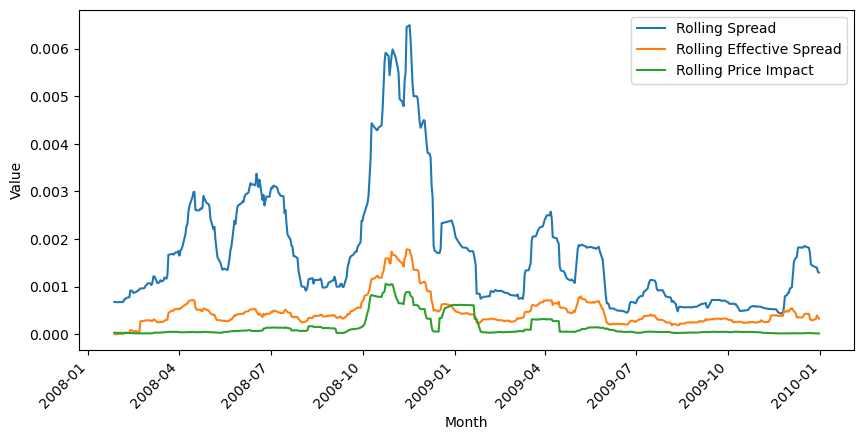

In [112]:
JPY = pd.concat(JPY_list, axis=0, ignore_index=None)
JPY.dropna(subset=['ILS'], inplace=True)
JPY.dropna(subset=['ILE'], inplace=True)
JPY.dropna(subset=['ILP'], inplace=True)
rolling_spread = JPY['ILS'].rolling(window=20).mean()
rolling_effective =  JPY['ILE'].rolling(window=20).mean()
rolling_pi =  JPY['ILP'].rolling(window=20).mean()
rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

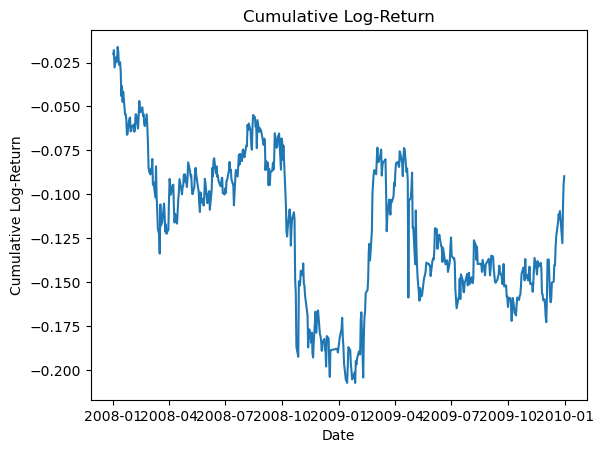

In [113]:
cumulative_log_return = JPY['Return'].cumsum()
plt.plot(JPY.index, cumulative_log_return)
plt.title('Cumulative Log-Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Return')
plt.show()

In [115]:
JPY.to_csv('data/market liquidity/JPY.csv')

In [94]:
correlation = JPY['ILS'].corr(JPY['ILE'])
correlation

0.6886286373257448

#### CAD

In [114]:
file_list = glob.glob('2008ACJU/*-CAD=D3.csv')
CAD_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: 1 if 'b' in x else (-1 if 's' in x else 0))
    
    # quoted spread
    temp_month['ILS'] = (temp_month['Ask Price'] - temp_month['Bid Price'])/temp_month['mid']
   
    # effective spread
    temp_month['ILE'] = ((temp_month['Price'] - temp_month['mid'])/temp_month['mid'])*temp_month['indicator']
    
    
    # price impact
    temp_month['ILP']= (temp_month['mid'] - temp_month['mid'].shift()) *temp_month['indicator'].shift()/temp_month['mid']
    temp_month['ILP'] = temp_month['ILP'].mask(temp_month['ILP'] < 0) # replace negative values with nan
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact 
    #condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    #temp_list =[np.nan]*len(temp_month)
    #for i in tqdm(condition_indices):
        #j = i + 1
        #while j < len(temp_month):
            #time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            #if time_diff > 60:
                #temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                #break
            #j += 1
            
    #temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    temp_month_return = temp_month.groupby('Date[G]').apply(lambda x: np.log(x.iloc[-1]['mid']) - np.log(x.iloc[0]['mid']))
    temp_month_return.name = 'Return' 
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    merged_df = pd.merge(temp_month_means , temp_month_return,on='Date[G]')
    CAD_list.append(merged_df)

100%|█████████████████████████████████████████████████| 24/24 [00:32<00:00,  1.34s/it]


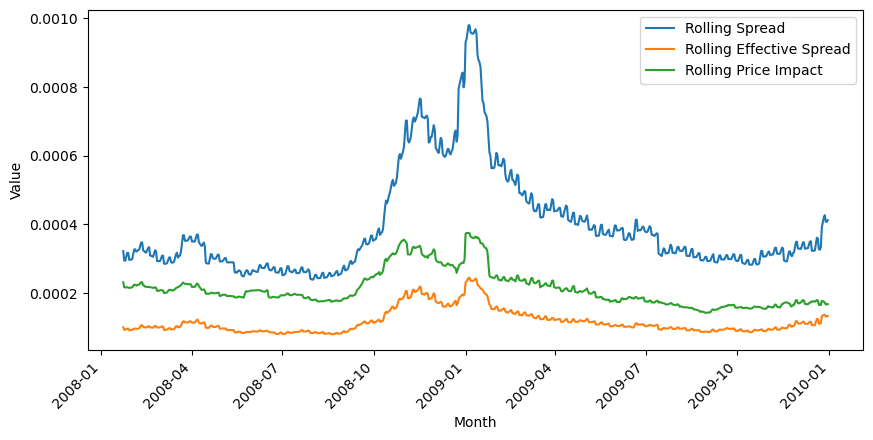

In [117]:
CAD = pd.concat(CAD_list, axis=0, ignore_index=None)
CAD.dropna(subset=['ILS'], inplace=True)
CAD.dropna(subset=['ILE'], inplace=True)
CAD.dropna(subset=['ILP'], inplace=True)

rolling_spread = CAD['ILS'].rolling(window=20).mean()
rolling_effective =  CAD['ILE'].rolling(window=20).mean()
rolling_pi =  CAD['ILP'].rolling(window=20).mean()

rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()


In [118]:
CAD.to_csv('data/market liquidity/CAD.csv')

In [89]:
correlation = CAD['ILS'].corr(CAD['ILE'])
correlation

0.9043112006702533

#### indirect

In [60]:
file_list = glob.glob('2008ACJU/*-CAD=D3.csv')
CAD_indirect_list = []
for file in tqdm(file_list):
    temp_month = pd.read_csv(file)
    temp_month = temp_month [(temp_month ['Type'] == 'Trade') | (( temp_month ['Bid Price']!=0 )&( temp_month ['Ask Price']!=0))] .reset_index(drop=True)

    temp_month['Ask Price'].fillna(method='ffill', inplace=True)
    temp_month['Bid Price'].fillna(method='ffill', inplace=True)
    # DATA CLEANING: in line 127716 -127718, the price of 2009ACJU/-2009-01-CAD=D3.csv, the bid price is 0.00001 for CAD
    temp_month = temp_month[(temp_month['Ask Price']-  temp_month['Bid Price'])<temp_month['Bid Price']]
    temp_month = temp_month[(temp_month ['Type'] == 'Quote') | ((temp_month['Price'] <= temp_month['Ask Price']) & (temp_month['Price'] >= temp_month['Bid Price']))]
    
    # change to USD/JPY
    temp1 = 1 / temp_month['Bid Price']
    temp2 = 1 / temp_month['Ask Price']

    temp_month['Price'] = 1/temp_month['Price']
    temp_month['Bid Price'] = temp2
    temp_month['Ask Price'] = temp1 
    
    #mid-quote
    temp_month['mid'] = (temp_month['Ask Price'] + temp_month['Bid Price'])/2
    temp_month.dropna(subset=['mid'], inplace=True) # some months may start with NANs
    # buy +1 sell -1
    temp_month['indicator']= temp_month['Qualifiers'].apply(lambda x: -1 if 'b' in x else (1 if 's' in x else 0))
    
     # quoted spread
    temp_month['ILS'] = temp_month['Ask Price'] - temp_month['Bid Price']
  
    
    # effective spread
    temp_month['ILE'] = 2* (temp_month['Price'] - temp_month['mid'])*temp_month['indicator']
    
    #temp_month['Time[G]']= pd.to_datetime(temp_month['Time[G]']) #ignore the date
    
    # price impact
    temp_month['ILP']= (temp_month['mid'] - temp_month['mid'].shift()) *temp_month['indicator'].shift()
    temp_month['ILP'] = temp_month['ILP'].mask(temp_month['ILP'] < 0) # replace negative values with nan
    #condition_indices = list(temp_month[temp_month['Type']=='Trade'].index)
    #temp_list =[np.nan]*len(temp_month)
    #for i in tqdm(condition_indices):
        #j = i + 1
        #while j < len(temp_month):
            #time_diff = (temp_month.iloc[j]['Time[G]'] - temp_month.iloc[i]['Time[G]']).total_seconds()
            #if time_diff > 60:
                #temp_list[j] = (temp_month.iloc[j]['mid']- temp_month.iloc[i-1]['mid'])*temp_month.iloc[i]['indicator']
                #break
            #j += 1
            
    #temp_month['ILP'] = temp_list
    
    temp_month['Date[G]'] = pd.to_datetime(temp_month['Date[G]'])
    
    temp_month_means =temp_month.groupby(pd.Grouper(key='Date[G]', freq='D')).mean() # Group by day and calculate mean of each group
    
    CAD_indirect_list.append(temp_month_means)
    

100%|█████████████████████████████████████████████████| 24/24 [00:27<00:00,  1.15s/it]


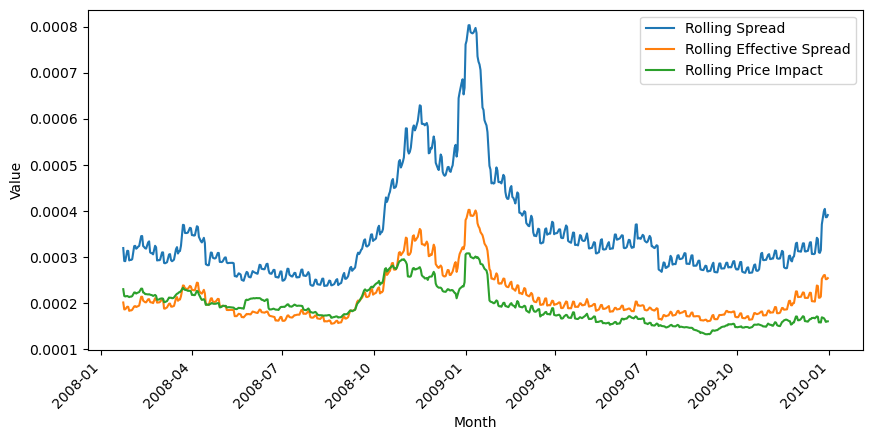

In [61]:
CAD_indrect = pd.concat(CAD_indirect_list , axis=0, ignore_index=None)
CAD_indrect.dropna(subset=['ILS'], inplace=True)
CAD_indrect.dropna(subset=['ILE'], inplace=True)
CAD_indrect.dropna(subset=['ILP'], inplace=True)
#JPY_indrect['ILS'] = JPY_indrect['ILS']/JPY_indrect['mid']
#JPY_indrect['ILE'] = JPY_indrect['ILE']/JPY_indrect['mid']
#JPY_indrect['ILP'] = JPY_indrect['ILP']/JPY_indrect['mid']

rolling_spread = CAD_indrect['ILS'].rolling(window=20).mean()
rolling_effective =  CAD_indrect['ILE'].rolling(window=20).mean()
rolling_pi = CAD_indrect['ILP'].rolling(window=20).mean()
rolling_df = pd.DataFrame({'Date': rolling_spread.index, 'Rolling Spread': rolling_spread.values,
                           'Rolling Effective Spread':rolling_effective.values,'Rolling Price Impact':rolling_pi*10})
rolling_df.set_index('Date', inplace=True)

ax = rolling_df.plot(y=['Rolling Spread', 'Rolling Effective Spread','Rolling Price Impact'], figsize=(10, 5)) # Plot the time series for the three columns
ax.set_xlabel('Month')
ax.set_ylabel('Value')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

In [62]:
CAD_indrect.to_csv('data/market liquidity/CAD_indirect.csv')

Clearly there seem to be some issues with the massive jumps that occur
Plot a rolling average of the bid/ask spread sampled from every 50 ticks.